In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Statistical Mechanics
## Random Walk on a 1D lattice
Consider the random walk of a single particle on a line.
The probability that after $N$ jumps the particle is at a position $n$
with respect to its origin is:
\begin{equation}
\ln\left(P\left(n,N\right)\right) \approx \frac{1}{2} \ln
\left(\frac{2}{\pi N} \right) - \frac{n^2}{2N}
\end{equation}

![random1d](https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/12024/26d1b530f7924ec8ac017156c3050a2f/9da3655a-dd28-4367-90f0-47557c19448c.png)

*A random walk of a single particle on a line. After $N$ jumps the
 particle that started at the origin has travelled a distance $n$. We are
 interested in $\left\langle n^2\right\rangle$ as function of time.
 The update frequency $\tau=1$ and the lattice spacing $\lambda=1$.
 Hence, time is equal to the number of jumps $N$.*

1. Derive this equation.
The probability to jump to one direction
equals the probability to jump to the other direction.
For large $y$, $y!$ can be approximated by:
\begin{equation}
y! \approx \left(2 \pi\right)^{\frac{1}{2}} y^{y+ \frac{1}{2}}
\exp\left[-y\right]
\end{equation}
(Hint: Have a look at the derivation in question 1.1.3 (distribution of particles). Note that the
equation is not normalized because it does not include the Jacobian of
transformation ($dn=\frac{1}{2}$).

# Answer
same as the derivation in Q1.1
好的，我们来推导这个近似并计算扩散系数。

**1. 随机游走模型与精确概率**

总跳跃次数：$N = N_R + N_L$
最终位置：$n = N_R \lambda - N_L \lambda = N_R - N_L$ （因为 $\lambda=1$）

我们可以用 $N$ 和 $n$ 来表示 $N_R$ 和 $N_L$：
$N_R = \frac{N+n}{2}$
$N_L = \frac{N-n}{2}$
请注意，$N_R$ 和 $N_L$ 必须是整数，这意味着 $N$ 和 $n$ 必须具有相同的奇偶性（同为奇数或同为偶数）。如果奇偶性不同，$P(n, N)=0$。

这是一个二项分布问题。在 $N$ 次跳跃中，有 $N_R$ 次向右的特定序列的概率是 $(1/2)^{N_R} (1/2)^{N_L} = (1/2)^N$。而这样的序列总共有 $\binom{N}{N_R}$ 种。因此，粒子在 $N$ 次跳跃后位于位置 $n$ 的精确概率是：
$$P(n, N) = \binom{N}{N_R} \left(\frac{1}{2}\right)^N = \frac{N!}{N_R! N_L!} \left(\frac{1}{2}\right)^N = \frac{N!}{\left(\frac{N+n}{2}\right)! \left(\frac{N-n}{2}\right)!} \left(\frac{1}{2}\right)^N$$

**2. 使用斯特林近似推导近似概率**

当 $N$ 很大时，直接计算阶乘会很困难。我们使用斯特林近似： $\ln(k!) \approx k \ln k - k + \frac{1}{2} \ln(2\pi k)$。
取 $P(n, N)$ 的自然对数：
$$\ln P(n, N) = \ln(N!) - \ln(N_R!) - \ln(N_L!) - N \ln 2$$
将 $N_R = (N+n)/2$ 和 $N_L = (N-n)/2$ 代入，并应用斯特林公式：

\begin{align*} \label{eq:1} \ln P(n, N) \approx &\left(N \ln N - N + \frac{1}{2} \ln(2\pi N)\right) \\ &- \left(\frac{N+n}{2} \ln\left(\frac{N+n}{2}\right) - \frac{N+n}{2} + \frac{1}{2} \ln\left(2\pi \frac{N+n}{2}\right)\right) \\ &- \left(\frac{N-n}{2} \ln\left(\frac{N-n}{2}\right) - \frac{N-n}{2} + \frac{1}{2} \ln\left(2\pi \frac{N-n}{2}\right)\right) \\ &- N \ln 2\end{align*}

注意到线性项 $-N - (-\frac{N+n}{2}) - (-\frac{N-n}{2}) = -N + \frac{N}{2} + \frac{n}{2} + \frac{N}{2} - \frac{n}{2} = 0$ 相互抵消。
整理对数项：
\begin{align*} \ln P(n, N) \approx & N \ln N - \frac{N+n}{2} \ln\left(\frac{N+n}{2}\right) - \frac{N-n}{2} \ln\left(\frac{N-n}{2}\right) \\ &+ \frac{1}{2} \ln(2\pi N) - \frac{1}{2} \ln(\pi(N+n)) - \frac{1}{2} \ln(\pi(N-n)) - N \ln 2 \end{align*}
进一步简化：
\begin{align*} \ln\left(\frac{N+n}{2}\right) &= \ln\left(\frac{N}{2}\left(1+\frac{n}{N}\right)\right) = \ln\left(\frac{N}{2}\right) + \ln\left(1+\frac{n}{N}\right) \\ \ln\left(\frac{N-n}{2}\right) &= \ln\left(\frac{N}{2}\left(1-\frac{n}{N}\right)\right) = \ln\left(\frac{N}{2}\right) + \ln\left(1-\frac{n}{N}\right)\end{align*}
代入第一行对数项：
\begin{align*} & N \ln N - \frac{N+n}{2} \left[\ln\left(\frac{N}{2}\right) + \ln\left(1+\frac{n}{N}\right)\right] - \frac{N-n}{2} \left[\ln\left(\frac{N}{2}\right) + \ln\left(1-\frac{n}{N}\right)\right] - N \ln 2 \\ &= N \ln N - \left(\frac{N+n}{2} + \frac{N-n}{2}\right) \ln\left(\frac{N}{2}\right) - \frac{N+n}{2} \ln\left(1+\frac{n}{N}\right) - \frac{N-n}{2} \ln\left(1-\frac{n}{N}\right) - N \ln 2 \\ &= N \ln N - N \ln\left(\frac{N}{2}\right) - \frac{N+n}{2} \ln\left(1+\frac{n}{N}\right) - \frac{N-n}{2} \ln\left(1-\frac{n}{N}\right) - N \ln 2 \\ &= N (\ln N - \ln N + \ln 2) - \frac{N+n}{2} \ln\left(1+\frac{n}{N}\right) - \frac{N-n}{2} \ln\left(1-\frac{n}{N}\right) - N \ln 2 \\ &= N \ln 2 - \frac{N+n}{2} \ln\left(1+\frac{n}{N}\right) - \frac{N-n}{2} \ln\left(1-\frac{n}{N}\right) - N \ln 2 \\ &= -\frac{N+n}{2} \ln\left(1+\frac{n}{N}\right) - \frac{N-n}{2} \ln\left(1-\frac{n}{N}\right)\end{align*}
现在，我们假设 $N$ 很大，并且 $n \ll N$（即粒子偏离原点的距离远小于总步数）。在这种情况下，我们可以使用泰勒展开 $\ln(1+x) \approx x - \frac{x^2}{2}$ 对于小的 $x$。令 $x = n/N$：
\begin{align*} &\approx -\frac{N+n}{2} \left(\frac{n}{N} - \frac{n^2}{2N^2}\right) - \frac{N-n}{2} \left(-\frac{n}{N} - \frac{n^2}{2N^2}\right) \\ &= -\frac{N}{2}\left(1+\frac{n}{N}\right) \left(\frac{n}{N} - \frac{n^2}{2N^2}\right) - \frac{N}{2}\left(1-\frac{n}{N}\right) \left(-\frac{n}{N} - \frac{n^2}{2N^2}\right) \\ &= -\frac{N}{2}\left(\frac{n}{N} - \frac{n^2}{2N^2} + \frac{n^2}{N^2} - \frac{n^3}{2N^3}\right) - \frac{N}{2}\left(-\frac{n}{N} - \frac{n^2}{2N^2} + \frac{n^2}{N^2} + \frac{n^3}{2N^3}\right) \\ &\approx -\frac{N}{2}\left(\frac{n}{N} + \frac{n^2}{2N^2}\right) - \frac{N}{2}\left(-\frac{n}{N} + \frac{n^2}{2N^2}\right) \quad (\text{忽略 } n^3/N^3 \text{ 及更高阶项}) \\ &= -\left(\frac{n}{2} + \frac{n^2}{4N}\right) - \left(-\frac{n}{2} + \frac{n^2}{4N}\right) \\ &= -\frac{n^2}{2N}\end{align*}
接下来处理 $\ln(2\pi k)$ 相关的项：
\begin{align*} & \frac{1}{2} \ln(2\pi N) - \frac{1}{2} \ln(\pi(N+n)) - \frac{1}{2} \ln(\pi(N-n)) \\ &= \frac{1}{2} \left[ \ln(2\pi N) - \ln(\pi N (1+n/N)) - \ln(\pi N (1-n/N)) \right] \\ &= \frac{1}{2} \left[ \ln 2 + \ln(\pi N) - (\ln(\pi N) + \ln(1+n/N)) - (\ln(\pi N) + \ln(1-n/N)) \right] \\ &= \frac{1}{2} \left[ \ln 2 - \ln(\pi N) - (\ln(1+n/N) + \ln(1-n/N)) \right] \\ &= \frac{1}{2} \left[ \ln\left(\frac{2}{\pi N}\right) - \ln((1+n/N)(1-n/N)) \right] \\ &= \frac{1}{2} \left[ \ln\left(\frac{2}{\pi N}\right) - \ln(1 - n^2/N^2) \right]\end{align*}
因为 $n \ll N$，所以 $n^2/N^2$ 非常小，$\ln(1 - n^2/N^2) \approx -n^2/N^2$。这一项相对于我们保留的 $-n^2/(2N)$ 是高阶小量，可以忽略。
因此，$\ln(2\pi k)$ 相关项近似为 $\frac{1}{2} \ln\left(\frac{2}{\pi N}\right)$。

将两部分合并，我们得到最终的近似：
$$\ln\left(P\left(n,N\right)\right) \approx \frac{1}{2} \ln \left(\frac{2}{\pi N} \right) - \frac{n^2}{2N}$$
这正是题目中给出的近似形式。这表明，对于大的 $N$，位置 $n$ 的概率分布近似于一个均值为 0、方差为 $N$ 的高斯分布（正态分布）：
$$P(n, N) \approx \sqrt{\frac{2}{\pi N}} e^{-n^2/(2N)}$$
(注意：这是一个离散概率分布，其包络线是连续高斯概率密度函数 $\frac{1}{\sqrt{2\pi N}} e^{-n^2/(2N)}$ 乘以步长 2，因为 $n$ 的取值间隔为 2。)

**3. 计算均方位移 $\langle n^2 \rangle$**

我们可以直接计算 $\langle n^2 \rangle$。令 $X_i$ 表示第 $i$ 次跳跃的位移，它可以是 $+1$ 或 $-1$，概率均为 $1/2$。
$N$ 次跳跃后的总位移为 $n = \sum_{i=1}^N X_i$。
平均位移：$\langle n \rangle = \langle \sum_{i=1}^N X_i \rangle = \sum_{i=1}^N \langle X_i \rangle$。
由于 $\langle X_i \rangle = (+1) \times \frac{1}{2} + (-1) \times \frac{1}{2} = 0$，所以 $\langle n \rangle = 0$。
均方位移：$\langle n^2 \rangle = \langle (\sum_{i=1}^N X_i)^2 \rangle = \langle \sum_{i=1}^N X_i^2 + \sum_{i \neq j} X_i X_j \rangle$。
根据期望的线性性质：$\langle n^2 \rangle = \sum_{i=1}^N \langle X_i^2 \rangle + \sum_{i \neq j} \langle X_i X_j \rangle$。
计算各项期望：
* $\langle X_i^2 \rangle = (+1)^2 \times \frac{1}{2} + (-1)^2 \times \frac{1}{2} = 1 \times \frac{1}{2} + 1 \times \frac{1}{2} = 1$。
* 对于 $i \neq j$，由于每次跳跃是独立的，$\langle X_i X_j \rangle = \langle X_i \rangle \langle X_j \rangle = 0 \times 0 = 0$。
代入：
$$\langle n^2 \rangle = \sum_{i=1}^N (1) + \sum_{i \neq j} (0) = N$$
因此，均方位移与跳跃次数 $N$ 成正比：$\langle n^2 \rangle = N$。

**4. 扩散系数的理论值**

扩散过程的均方位移通常与时间 $t$ 和扩散系数 $D$ 相关，关系式为：
$$\langle (\Delta x)^2 \rangle = 2 d D t$$
其中：
* $\langle (\Delta x)^2 \rangle$ 是均方位移。
* $d$ 是空间的维度。
* $D$ 是扩散系数。
* $t$ 是时间。

在我们的问题中：
* 位移 $\Delta x = n \lambda = n \times 1 = n$。所以 $\langle (\Delta x)^2 \rangle = \langle n^2 \rangle = N$。
* 维度 $d=1$。
* 时间 $t = N \tau = N \times 1 = N$。

将这些代入扩散方程：
$$N = 2 \times 1 \times D \times N$$
$$N = 2 D N$$
解出 $D$：$$D = \frac{1}{2}$$

**结论**

1.  对于一维随机游走，当跳跃次数 $N$ 很大时，粒子在位置 $n$ 的概率的对数近似为 $\ln\left(P\left(n,N\right)\right) \approx \frac{1}{2} \ln \left(\frac{2}{\pi N} \right) - \frac{n^2}{2N}$，这对应于一个离散化的、均值为 0、方差为 $N$ 的高斯分布。
2.  该随机游走过程的理论扩散系数为 $D = \frac{1}{2}$ （在 $\lambda=1, \tau=1$ 的单位下）。

2. Comparing the above to the point solution in 1D:
 \begin{equation}
p(x,t)=\frac{1}{\sqrt{4\pi Dt}}
 e^{\frac{-x^2}{4 Dt}},
\end{equation}
we conclude
\begin{equation}
 D=\frac{1}{2}\left\langle r^2\right\rangle.
\end{equation}

Use the below code to compare this theoretical result with the computed root mean square displacement and the computed function $P\left(n,N\right)$. What is the diffusion coefficient, $D$, of
this system? (see also page 87-88 in the book).

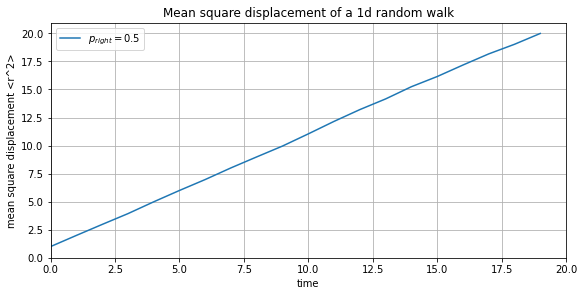

In [ ]:
def random_walks(time: int, cycles: int, probability: float=0.5) -> np.ndarray:
    """ Generate random walks on a 1-D lattice. """
    steps= np.random.choice([-1, 1], size=(cycles, time),p=[probability,1-probability])
    # sum steps to get cycles*time
    pos = np.cumsum(steps,axis=1)
    return pos
    
def main():
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 1, figsize=(8, 4), constrained_layout=True)
    ax.grid()
    
    time = 20
    cycles = 10000
    probabilities = [0.5]
    
    for p in probabilities:
        displacement = random_walks(time=time, cycles=cycles, probability=p)
        msd = (displacement * displacement).mean(axis=0)
        ax.plot(msd, label=fr'$p_{{right}}={p}$')
    
    ax.set_title("Mean square displacement of a 1d random walk")
    ax.set_xlabel("time")
    ax.set_ylabel("mean square displacement <r^2>")
    ax.set_xlim(0, time)
    ax.set_ylim(0, None)
    ax.legend()
    plt.show()


if __name__ == "__main__":
    main()

3. Modify the program in such a way that the probability to jump in
one direction equals $0.8$. What happens?

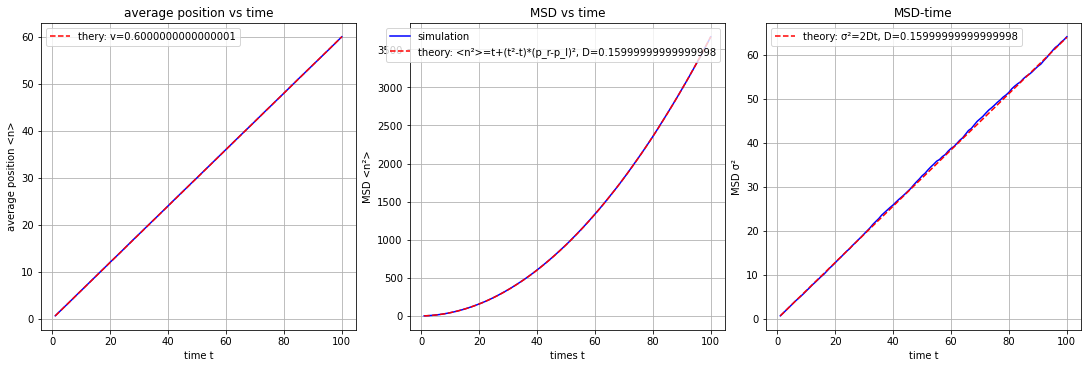

not  (p_right = 0.8):
theory velocity: v = 0.6000000000000001
measured velocity: v = 0.6000
theory Diffusion coefficient: D = 0.15999999999999998
measured D: D = 0.3206


In [13]:
def analyze_biased_walk(probability_right=0.8, time=1000, cycles=10000):
    """分析不对称随机游走的特性"""
    p_left = 1 - probability_right
    
    # 理论漂移速度和扩散系数
    v_theory = probability_right - p_left
    D_theory = probability_right * p_left
    
    displacement = random_walks(time=time, cycles=cycles, probability=p_left)
    
    # 计算平均位置（漂移）
    mean_pos = displacement.mean(axis=0)
    
    # 计算均方位移
    msd = (displacement * displacement).mean(axis=0)
    
    # 计算漂移后的方差 (从漂移均值计算方差)
    variance = ((displacement - mean_pos)**2).mean(axis=0)
    
    # 绘图
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
    
    times = np.arange(1, time+1)
    
    # 绘制平均位置
    ax1.plot(times, mean_pos, 'b-')
    ax1.plot(times, v_theory * times, 'r--', label=f'thery: v={v_theory}')
    ax1.set_title("average position vs time")
    ax1.set_xlabel("time t")
    ax1.set_ylabel("average position <n>")
    ax1.grid(True)
    ax1.legend()
    
    # 绘制均方位移
    ax2.plot(times, msd, 'b-', label='simulation')
    # plot theory line
    ax2.plot(times, times+(times*times-times)*0.36, 'r--', label=f'theory: <n²>=t+(t²-t)*(p_r-p_l)², D={D_theory}')
    ax2.set_title("MSD vs time")
    ax2.set_xlabel("times t")
    ax2.set_ylabel("MSD <n²>")
    ax2.legend()
    ax2.grid(True)
    
    # 绘制方差
    ax3.plot(times, variance, 'b-')
    ax3.plot(times, 4 * D_theory * times, 'r--', label=f'theory: σ²=2Dt, D={D_theory}')
    ax3.set_title("MSD-time")
    ax3.set_xlabel("time t")
    ax3.set_ylabel("MSD σ²")
    ax3.grid(True)
    ax3.legend()
    
    plt.show()
    
    # 打印最终结果
    measured_v = mean_pos[-1] / time
    measured_D = variance[-1] / (2 * time)
    
    print(f"not  (p_right = {probability_right}):")
    print(f"theory velocity: v = {v_theory}")
    print(f"measured velocity: v = {measured_v:.4f}")
    print(f"theory Diffusion coefficient: D = {D_theory}")
    print(f"measured D: D = {measured_D:.4f}")

analyze_biased_walk(probability_right=0.8, time=100, cycles=10000)

# Answer

$$\langle pos\rangle = N*(p_r-p_l)$$
$$\langle pos^2\rangle = N*(p_r+p_l)+(N^2- N)(p_r-p_l)^2$$
$$ \sigma^2 = 4Np_r*p_l$$